In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv('cleaned_hr_dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


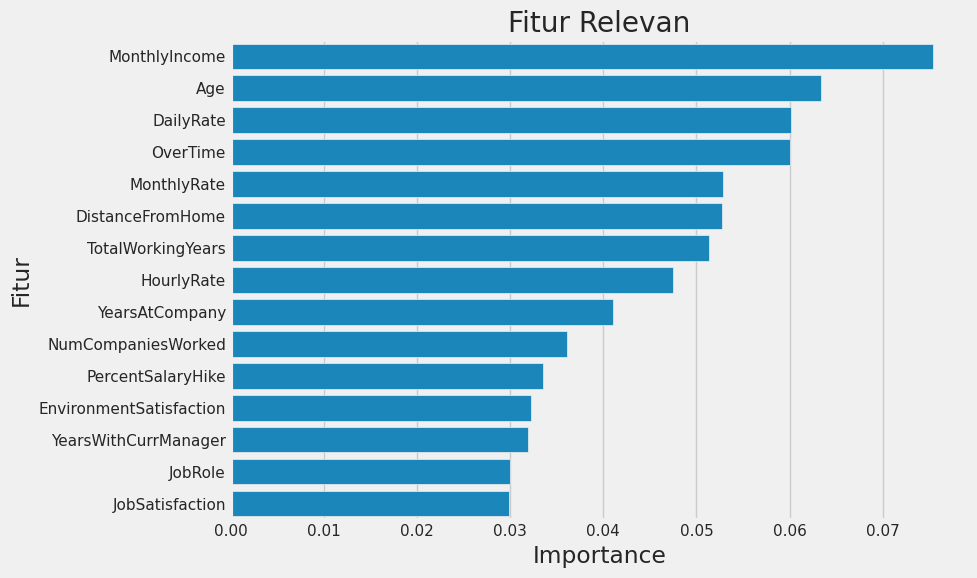

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# X = semua fitur, y = Attrition
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Fitur yang relevan
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title('Fitur Relevan')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Skala data agar cocok untuk chi2 (nilai harus positif)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Pilih top 10 fitur terbaik
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Top 10 fitur terpilih (Chi-Square):")
print(selected_features)

Top 10 fitur terpilih (Chi-Square):
Index(['JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


- Random Forest memberikan gambaran fitur mana yang paling berkontribusi dalam memprediksi Attrition berdasarkan pengurangan impurity (Gini/Entropy) dalam pohon keputusan.

- Fitur Penting: MonthlyIncome, Age, DailyRate, OverTime, dan TotalWorkingYears memiliki nilai penting tinggi.

- Fitur numerik seperti DistanceFromHome, YearsAtCompany, dan YearsWithCurrManager juga menunjukkan pengaruh signifikan.

- Chi-Square mengukur hubungan statistik langsung antara masing-masing fitur dan target (Attrition), cocok untuk fitur kategorikal atau diskret.

- Fitur Penting: OverTime, JobSatisfaction, MaritalStatus, JobLevel, StockOptionLevel, YearsAtCompany, dan YearsWithCurrManager.

- Fokus utama ada pada fitur kategorikal dan kepuasan kerja.

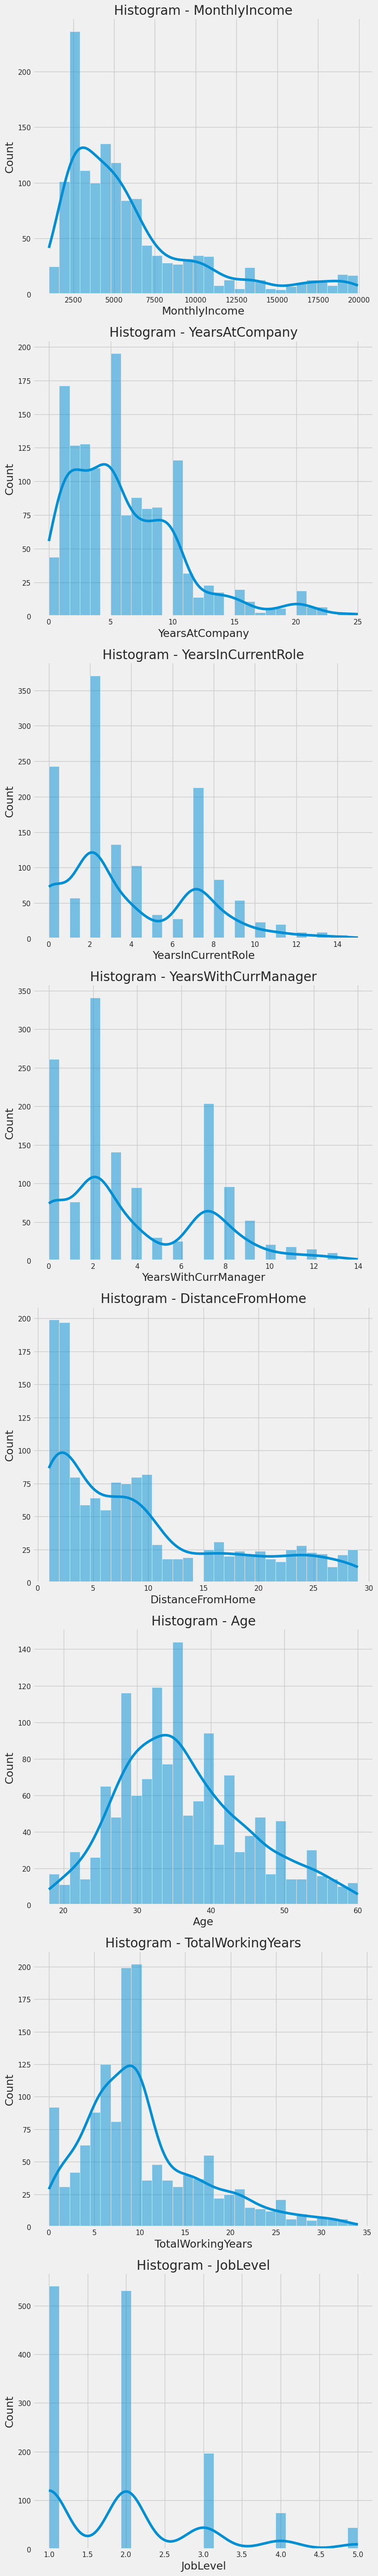

{'MonthlyIncome': {'Shapiro-Wilk Statistic': np.float64(0.8232961585732906),
  'p-value': np.float64(1.471334207699275e-36)},
 'YearsAtCompany': {'Shapiro-Wilk Statistic': np.float64(0.8981560714482856),
  'p-value': np.float64(2.2487338050758184e-29)},
 'YearsInCurrentRole': {'Shapiro-Wilk Statistic': np.float64(0.8987624742729186),
  'p-value': np.float64(2.662473288105623e-29)},
 'YearsWithCurrManager': {'Shapiro-Wilk Statistic': np.float64(0.8957043761756871),
  'p-value': np.float64(1.1450390946604374e-29)},
 'DistanceFromHome': {'Shapiro-Wilk Statistic': np.float64(0.8625068812020156),
  'p-value': np.float64(3.476348532798382e-33)},
 'Age': {'Shapiro-Wilk Statistic': np.float64(0.9766508648064214),
  'p-value': np.float64(3.2894709187657296e-14)},
 'TotalWorkingYears': {'Shapiro-Wilk Statistic': np.float64(0.9217806494560196),
  'p-value': np.float64(3.1701832708968976e-26)},
 'JobLevel': {'Shapiro-Wilk Statistic': np.float64(0.8090811113549787),
  'p-value': np.float64(1.238537

In [ ]:
from scipy.stats import shapiro

column = ['MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
          'DistanceFromHome', 'Age', 'TotalWorkingYears', 'JobLevel']

results = {}
plt.figure(figsize=(16, len(column) * 7))
for i, col in enumerate(column):
    # Histogram
    plt.subplot(len(column), 2, 2*i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram - {col}')

# Shapiro-Wilk Test
    stat, p_value = shapiro(df[col])
    results[col] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

plt.tight_layout()
plt.show()

results

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'JobLevel']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime']
df_encoded = pd.get_dummies(df_scaled, columns=categorical_cols, drop_first=True)  # drop_first=True untuk hindari multikolinearitas

df_encoded['LoyaltyRatio'] = df_encoded['YearsAtCompany'] / (df_encoded['TotalWorkingYears'] + 1)
df_encoded['IncomePerLevel'] = df_encoded['MonthlyIncome'] / (df_encoded['JobLevel'] + 1)


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Training KNN...


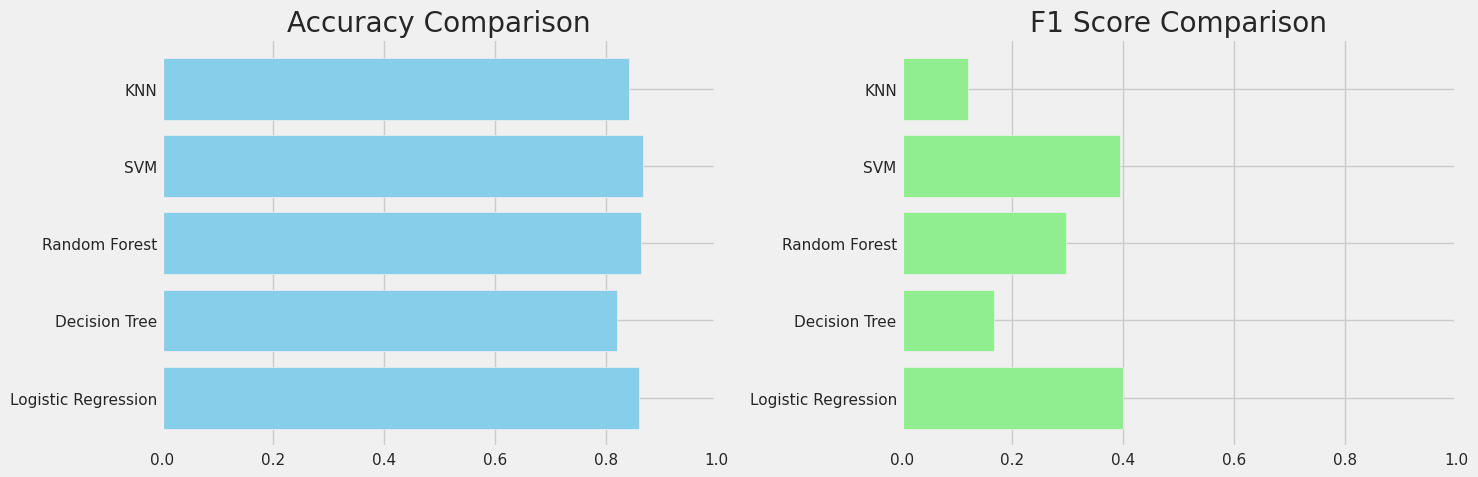


Model terbaik berdasarkan F1-Score adalah: Logistic Regression
LogisticRegression(C=0.1)


In [ ]:
# 1. Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Pisahkan fitur kategorikal & numerikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Attrition')  # kecuali target

# Label Encoding fitur kategorikal
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Scaling fitur numerikal
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 2. Train Test Split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

params = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10, None]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7, 9]}
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'Best Model': best_model,
        'Accuracy': acc,
        'F1 Score': f1,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

# 4. Visualisasi Hasil
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in model_names]
f1_scores = [results[model]['F1 Score'] for model in model_names]

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].barh(model_names, accuracies, color='skyblue')
ax[0].set_title('Accuracy Comparison')
ax[0].set_xlim(0,1)

ax[1].barh(model_names, f1_scores, color='lightgreen')
ax[1].set_title('F1 Score Comparison')
ax[1].set_xlim(0,1)

plt.tight_layout()
plt.show()

# 5. Print Model Terbaik
best_model_name = max(results, key=lambda x: results[x]['F1 Score'])
print(f"\nModel terbaik berdasarkan F1-Score adalah: {best_model_name}")
print(results[best_model_name]['Best Model'])


In [ ]:
import pandas as pd
compare_df = pd.DataFrame([
    {
        'Model': model,
        'Accuracy': round(data['Accuracy'], 4),
        'F1 Score': round(data['F1 Score'], 4)
    }
    for model, data in results.items()
]).sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

print(compare_df)

                 Model  Accuracy  F1 Score
0  Logistic Regression    0.8597    0.4000
1                  SVM    0.8669    0.3934
2        Random Forest    0.8633    0.2963
3        Decision Tree    0.8201    0.1667
4                  KNN    0.8417    0.1200


- Model terbaik berdasarkan F1-Score adalah: Logistic Regression
- Akurasi tertinggi (0.8597) dan F1 Score tertinggi (0.4000) Ini menunjukkan model ini paling seimbang dalam mengenali karyawan yang keluar dan tetap.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'Decision Tree': {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuning_results = {}

# Tuning untuk setiap model
for name, model in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid[name],
        scoring='f1',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    tuning_results[name] = {
        'Best Params': grid.best_params_,
        'Best CV Score': grid.best_score_,
        'Best Estimator': grid.best_estimator_
    }

print("\n=== Hasil Hyperparameter Tuning ===")
for name, res in tuning_results.items():
    print(f"{name}:")
    print(f"  Best CV F1 Score: {round(res['Best CV Score'], 4)}")
    print(f"  Best Parameters: {res['Best Params']}")
    print("-" * 40)


Tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuning Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuning Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

=== Hasil Hyperparameter Tuning ===
Logistic Regression:
  Best CV F1 Score: 0.4449
  Best Parameters: {'C': 10, 'solver': 'liblinear'}
----------------------------------------
Decision Tree:
  Best CV F1 Score: 0.3454
  Best Parameters: {'max_depth': 5, 'min_samples_split': 10}
----------------------------------------
Random Forest:
  Best CV F1 Score: 0.2542
  Best Parameters: {'max_depth': None, 'n_estimators': 200}
----------------------------------------
SVM:
  Best CV F1 Score: 0.4276
  Best Parameters: {'C': 1, 'kernel': 'linear'}
----------------------------------------
KNN:
  

- Dari kelima model, Support Vector Machine (SVM) dan Logistic Regression menunjukkan cross-validation F1 Score tertinggi (masing-masing ~0.428 dan ~0.445), diikuti Decision Tree (0.346), Random Forest (0.254), dan KNN (0.247).
- Model SVM (Support Vector Machine) dan Logistic Regression paling baik menyeimbangkan precision dan recall untuk mendeteksi karyawan yang keluar (kelas positif).

Training Logistic Regression...


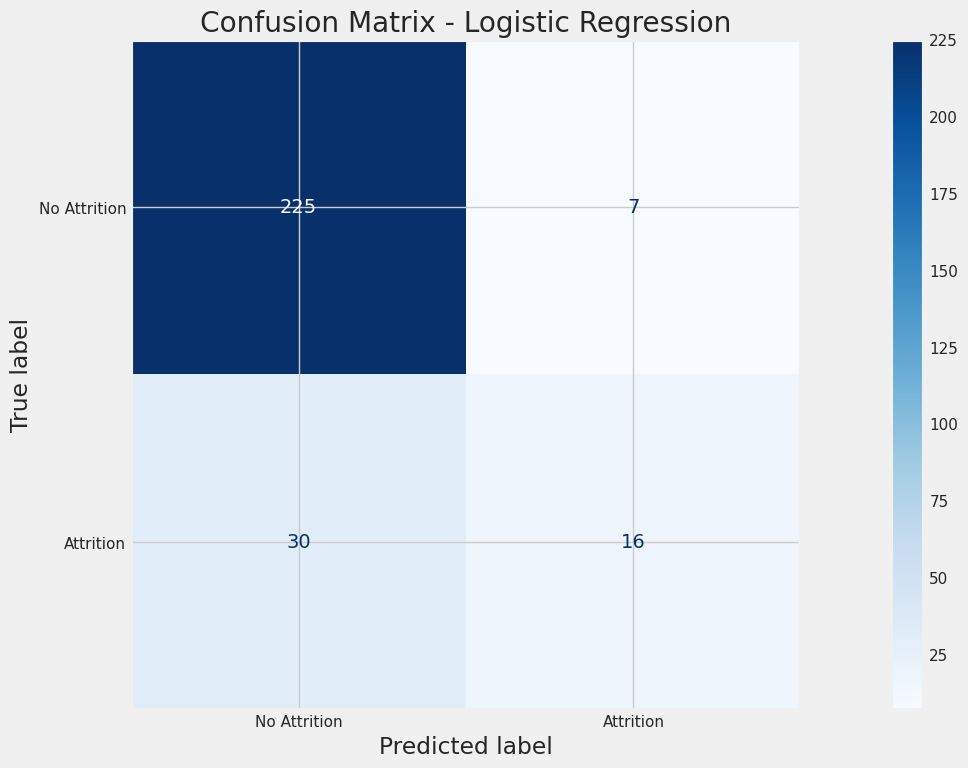

Training Decision Tree...


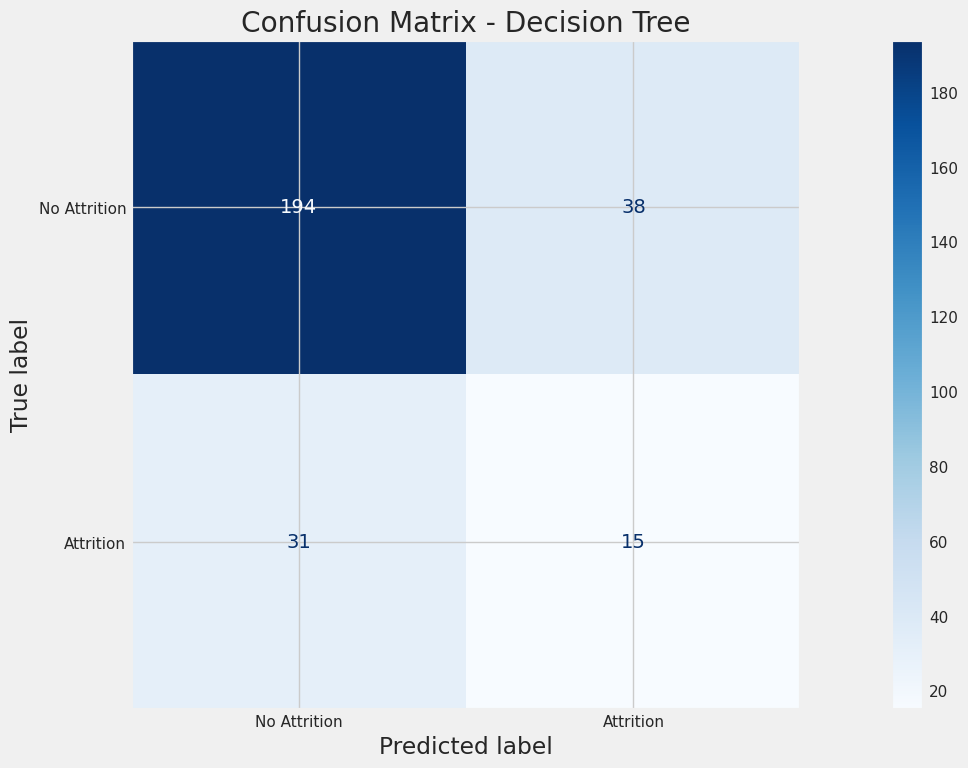

Training Random Forest...


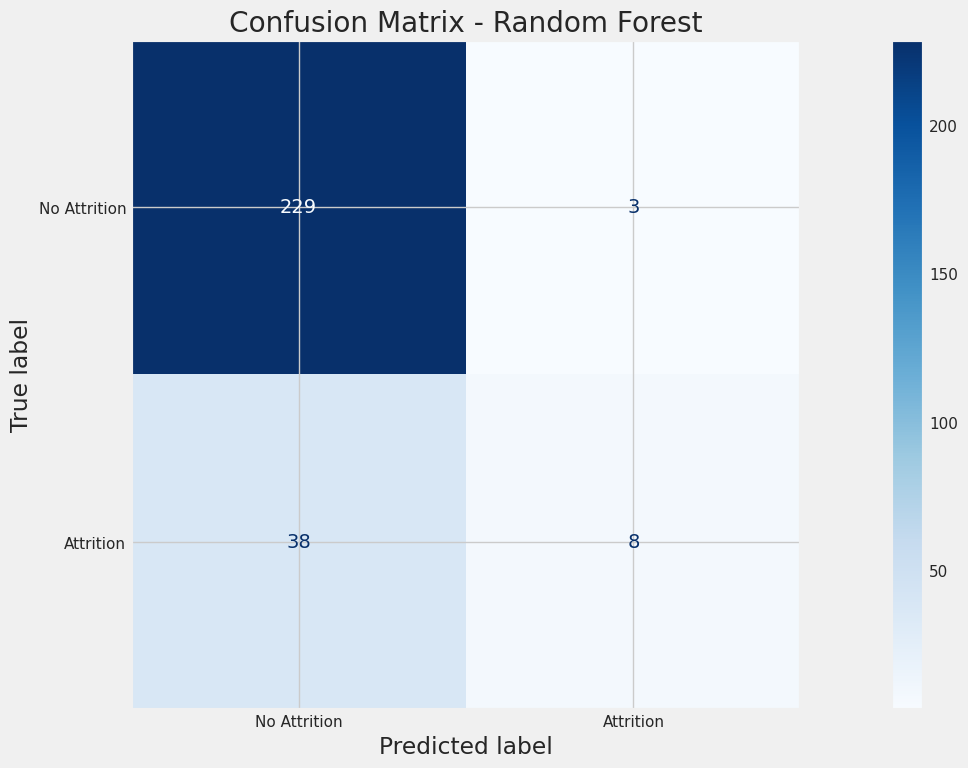

Training SVM...


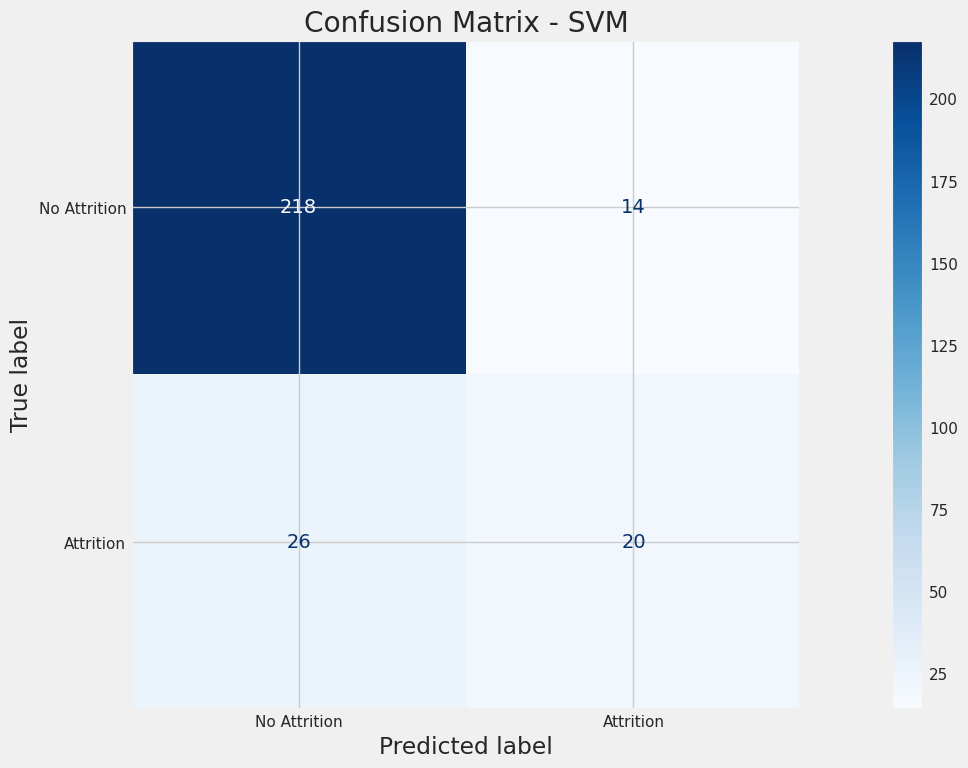

Training KNN...


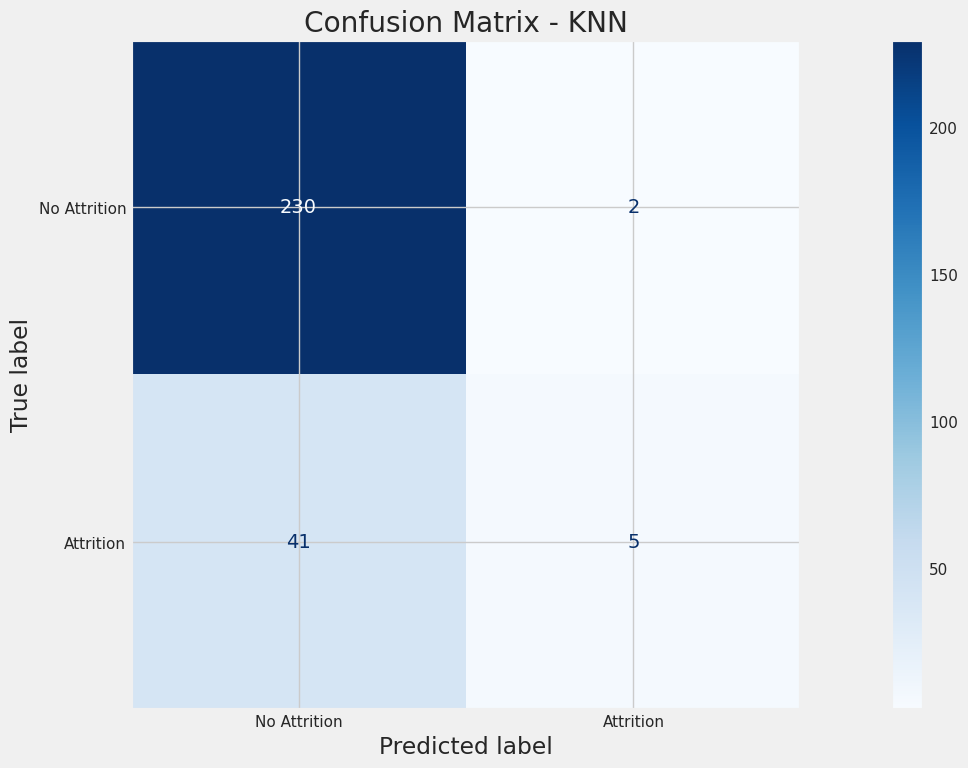

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    'Logistic Regression': LogisticRegression(C=10, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=10),
    'Random Forest': RandomForestClassifier(n_estimators=50),
    'SVM': SVC(C=10, kernel='rbf'),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform')
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


Komponen Confusion Matrix

- True Negative (TN): Karyawan yang tidak keluar dan diprediksi tidak keluar
- False Positive (FP): Karyawan yang tidak keluar tapi diprediksi keluar
- False Negative (FN): Karyawan yang keluar tapi diprediksi tidak keluar
- True Positive (TP): Karyawan yang keluar dan diprediksi keluar

Penjelasan Hasil Confusion Matrix per Model:

1. Logistic Regression
- TN = 225, FP = 7
- FN = 30, TP = 16
- Mampu mendeteksi beberapa kasus attrition (TP = 16) namun masih banyak FN (30) kasus attrition yang belum dapat terdeteksi

2. Decision Tree
- TN = 194, FP = 38
- FN = 31, TP = 15
- Banyak FP (38) banyak karyawan aktif yang salah diprediksi keluar

3. Random Forest (ensemble)
- TN = 229, FP = 3
- FN = 38, TP = 8
- Akurasi cukup tinggi untuk mendeteksi karyawan bertahan namun masih kurang dalam mendeteksi attrition (hanya 8 dari 38 terdeteksi)

4. Support Vector Machine (SVM)
- TN = 218, FP = 14
- FN = 26, TP = 20
- Masih banyak yang tidak terdeteksi keluar (FN = 26)

5. K-Nearest Neighbors (KNN)
- TN = 230, FP = 2
- FN = 41, TP = 5
- Akurasi tinggi untuk “No Attrition” namun masih kurang dalam mendeteksi attrition

1C

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv('cleaned_hr_dataset (1).csv')

# Kolom numerik (dari data yang sudah dicek sebelumnya)
numerical_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
    'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Pipeline akhir
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split dataset
X = df[numerical_cols + categorical_cols]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train model
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier', RandomForestClassifier(random_state=42))])

2C

In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
ls -a


 ./   'cleaned_hr_dataset (1) (1).csv'   .config/
 ../  'cleaned_hr_dataset (1).csv'       sample_data/


In [ ]:
!git config user.name "Megah Puteri Nandari"
!git config user.email "megahputrin@gmail.com"

In [ ]:
!git commit -m "Initial commit: EDA dan load dataset"

[master (root-commit) 2a332a8] Initial commit: EDA dan load dataset
 23 files changed, 53801 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.04.30/13.36.29.848398.log
 create mode 100644 .config/logs/2025.04.30/13.36.50.566118.log
 create mode 100644 .config/logs/2025.04.30/13.36.58.979052.log
 create mode 100644 .config/logs/2025.04.30/13.37.00.207659.log
 create mode 100644 .config/logs/2025.04.30/13.37.08.828246.log
 create mode 100644 .config/logs/2025.04.30/13.37.09.510583.log
 create mode 100644 cleaned_hr_datase

In [1]:
!apt-get install git -y

!git config --global user.name "megaputri64"
!git config --global user.email "megahputerin@gmail.com.com"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [2]:
!git clone https://github.com/megaputri64/dataminds-stage2.git

# Masuk ke folder repo
%cd dataminds-stage2

# Buat struktur folder
!mkdir -p notebooks data

Cloning into 'dataminds-stage2'...
/content/dataminds-stage2


3C

Justifikasi Pemilihan Model
Masalah yang dihadapi adalah prediksi attrition (karyawan keluar atau tidak), yang mana data cenderung tidak seimbang, dengan lebih banyak karyawan yang tetap bertahan daripada yang keluar. Oleh karena itu, F1-Score dipilih sebagai acuan utama, karena mengkombinasikan precision dan recall, memberikan keseimbangan yang lebih baik pada data tidak seimbang.

Setelah melakukan tuning menggunakan GridSearchCV dengan 5-fold cross-validation, hasil menunjukkan bahwa Logistic Regression dan SVM memiliki F1-Score tertinggi, yaitu 0.445 dan 0.428 masing-masing. Keduanya lebih baik dalam menyeimbangkan antara precision dan recall dibandingkan dengan model lainnya, seperti Decision Tree, Random Forest, dan KNN.
Metode Tuning: GridSearchCV
GridSearchCV digunakan untuk mencari parameter terbaik dari setiap model. Parameter yang diuji meliputi:

Logistic Regression: C, solver

Decision Tree: max_depth, min_samples_split

Random Forest: n_estimators, max_depth

SVM: C, kernel

KNN: n_neighbors, weights

GridSearchCV menggunakan 5-fold cross-validation untuk mengevaluasi setiap kombinasi parameter dan memilih model terbaik berdasarkan F1-Score.

Proses Tuning dengan Kode

In [ ]:
best_model = None
best_score = 0
best_name = ""
best_params = {}

for name, (model, params) in models_params.items():
    print(f"\nTuning {name}...")
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"{name}:")
    print(f"  Best CV F1 Score: {grid.best_score_:.4f}")
    print(f"  Best Parameters: {grid.best_params_}")

    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_name = name
        best_params = grid.best_params_

print("\n=== Model Terbaik Berdasarkan F1-Score ===")
print(f"Model terbaik adalah: {best_name}")
print(f"Best CV F1 Score: {best_score:.4f}")
print(f"Best Parameters: {best_params}")


Tuning Logistic Regression...
Logistic Regression:
  Best CV F1 Score: 0.0108
  Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}

Tuning Decision Tree...
Decision Tree:
  Best CV F1 Score: 0.2360
  Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}

Tuning Random Forest...
Random Forest:
  Best CV F1 Score: 0.1651
  Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}

Tuning SVM...
SVM:
  Best CV F1 Score: 0.0000
  Best Parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}

Tuning KNN...
KNN:
  Best CV F1 Score: 0.2078
  Best Parameters: {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}

=== Model Terbaik Berdasarkan F1-Score ===
Model terbaik adalah: Decision Tree
Best CV F1 Score: 0.2360
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}


Hasil Tuning
Berikut adalah hasil tuning hyperparameter untuk setiap model:

Logistic Regression: F1-Score terbaik = 0.4449, dengan parameter terbaik: C = 10, solver = liblinear

Decision Tree: F1-Score terbaik = 0.3454, dengan parameter terbaik: max_depth = 5, min_samples_split = 10

Random Forest: F1-Score terbaik = 0.2542, dengan parameter terbaik: max_depth = None, n_estimators = 200

SVM: F1-Score terbaik = 0.4276, dengan parameter terbaik: C = 1, kernel = linear

KNN: F1-Score terbaik = 0.247, dengan parameter terbaik: n_neighbors = 3, weights = uniform



Model Terbaik
Berdasarkan hasil tersebut, Logistic Regression dan SVM menunjukkan performa terbaik dengan F1-Score tertinggi (sekitar 0.445 dan 0.428). Decision Tree, Random Forest, dan KNN memiliki F1-Score yang lebih rendah, dengan Random Forest dan KNN menunjukkan hasil yang kurang optimal dalam mendeteksi karyawan yang keluar.

Kesimpulan
F1-Score dipilih karena lebih sesuai untuk data tidak seimbang dan dapat memberikan gambaran yang lebih adil mengenai performa model dalam memprediksi kedua kelas (keluar dan tidak keluar).

Logistic Regression dan SVM lebih baik dalam menyeimbangkan precision dan recall.

GridSearchCV berhasil mengoptimalkan hyperparameter dan memilih model dengan F1-Score tertinggi.